## Objective
In this section , the previous example will be reversed. That is, estimating the position with the measured velocity. Whichp part will be changed, and how, do you think? First of all, the measured paramter has been changed from position to velocity so the matrix $H$ in the system model should be changed.


#### System Model

In this case the matrix $H$ has to change and it will be defined as 
\begin{equation}
H = \begin{bmatrix} 0 & 1 \end{bmatrix}
\end{equation}

Applying the $H$ deffinition in to the system model 

\begin{align*}
z_k & = Hx_k + v_k\\
& = \begin{bmatrix} 0 & 1 \end{bmatrix}\begin{bmatrix}\text{position} \\ \text{velocity} \end{bmatrix}_k + v_k\\
& = \text{velocity}_k + v_k
\end{align*}

The change made in the system (the measurement is the velocity now) is well represented. Nothing else has been changed in the system model

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
def getPos(index,Posp, Velp):
    if firstloop:
        Posp = 0
        Velp = 0
    
    dt = 0.1
    
    w = 0 + 10*np.random.randn()
    v = 0 + 10*np.random.randn()
    
    z = Posp + vel*dt +v
    Posp = z - v # True position
    Velp = 80 + 2 # True speed
    
    return z

In [16]:
class KalmanFilter:
    """A 2D Kalman filter"""
    def __init__(self):
        """Initialize matrices and attributes"""
        self.dt = 0.1
        self.A = np.array([[1,self.dt],[0,1]])
        self.H = np.array([0,1])
        self.Q = np.array([[1, 0],[0,3]])
        self.R = 10
        self.x = np.array([0,20])
        self.P = 5*np.identity(2)
        self.xp = 0
        self.K = np.array([0,0])
        self.Pp = np.zeros((2,2))

    
    def updateFilter(self, z):
        self.xp = self.A @ self.x
        self.Pp = self.A @ self.P @ np.transpose(self.A) + self.Q

        K1 = self.Pp @ np.transpose(self.H)
        K2 = self.H @ self.Pp @ np.transpose(self.H) + self.R
        self.K = K1/K2
    
        self.x = self.xp + self.K*(z - self.H@self.xp)
        self.P = self.Pp - (self.H@self.Pp)*(np.transpose(self.K*np.ones((2,2))))
        return (self.x,self.K,self.P)
        

        



#### In the next cell is tested the correct implementation of the function, this has been compared with Octave Results

In [17]:
MyFilter = KalmanFilter()
MyFilter.updateFilter(80)

(array([ 3.66666667, 46.66666667]),
 array([0.02777778, 0.44444444]),
 array([[6.03611111, 0.27777778],
        [0.27777778, 4.44444444]]))

In [18]:
def getMeasure(index):
    if index == 0:
        getMeasure.Posp = 0
        getMeasure.Velp = 80
    
    dt = 0.1
    
    w = 0 + 10*np.random.randn()
    v = 0 + 10*np.random.randn()
    
    z = getMeasure.Posp + getMeasure.Velp*dt + v
    
    getMeasure.Posp = z - v  #True Position 
    getMeasure.Velp = 80 + w #True Position 
    
    return (z, getMeasure.Posp, getMeasure.Velp)

In [19]:
dt = 0.1;
t = np.arange(0,10+dt, dt)
measures = np.arange(0,len(t))
time_span = {"time":t}

data = pd.DataFrame({"sample":measures})

data["time"] = t

data['raw_signal'] = np.zeros((data.shape[0],1))
data['Kalman_pos'] = np.zeros((data.shape[0],1))
data['Kalman_vel'] = np.zeros((data.shape[0],1))
data['True_speed'] = np.zeros((data.shape[0],1))
data['k1_gain'] = np.zeros((data.shape[0],1))
data['k2_gain'] = np.zeros((data.shape[0],1))
data['k_cov_00'] = np.zeros((data.shape[0],1))
data['k_cov_01'] = np.zeros((data.shape[0],1))
data['k_cov_10'] = np.zeros((data.shape[0],1))
data['k_cov_11'] = np.zeros((data.shape[0],1))

data.head(10)


,sample,time,raw_signal,Kalman_pos,Kalman_vel,True_speed,k1_gain,k2_gain,k_cov_00,k_cov_01,k_cov_10,k_cov_11
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for index in data["sample"]:
    (z, posp, velp) = getMeasure(index)
    (x_state,K,P) = MyFilter.updateFilter(z)
    data.loc[index,"raw_signal"] = z
    data.loc[index,"Kalman_pos"] = x_state[0]
    data.loc[index,"True_speed"] = velp
    data.loc[index,"Kalman_vel"] = x_state[1]
    data.loc[index,"k1_gain"] = K[0]
    data.loc[index,"k2_gain"] = K[1]
    data.loc[index,"k_cov_00"] = P[0][0]
    data.loc[index,"k_cov_01"] = P[0][1]
    data.loc[index,"k_cov_10"] = P[1][0]
    data.loc[index,"k_cov_11"] = P[1][1]

In [21]:
data.head(10)

,sample,time,raw_signal,Kalman_pos,Kalman_vel,True_speed,k1_gain,k2_gain,k_cov_00,k_cov_01,k_cov_10,k_cov_11
0,0,0.0,12.395590,6.914467,32.041430,71.809049,0.041401,0.426752,7.106210,0.414013,0.414013,4.267516
1,1,0.1,6.947527,8.896775,21.479961,75.746296,0.048691,0.420878,8.190751,0.486905,0.486905,4.208779
2,2,0.2,19.101303,10.919294,20.483538,77.415442,0.052751,0.418901,9.282333,0.527512,0.527512,4.189012
3,3,0.3,27.247973,13.340092,23.312648,81.724231,0.055059,0.418233,10.377617,0.550592,0.550592,4.182330
4,4,0.4,51.275956,17.248067,35.001500,67.989248,0.056385,0.418007,11.474931,0.563849,0.563849,4.180068
5,5,0.5,42.212960,21.160358,38.015386,83.478896,0.057151,0.417930,12.573388,0.571509,0.571509,4.179301
6,6,0.6,48.609361,25.572055,42.442652,54.484302,0.057595,0.417904,13.672496,0.575948,0.575948,4.179041
7,7,0.7,59.778443,30.819241,49.687199,78.091292,0.057853,0.417895,14.771979,0.578526,0.578526,4.178953
8,8,0.8,62.834591,36.550542,55.181393,65.404684,0.058002,0.417892,15.871679,0.580025,0.580025,4.178924
9,9,0.9,62.352207,42.485231,58.178015,83.458366,0.058090,0.417891,16.971504,0.580896,0.580896,4.178914


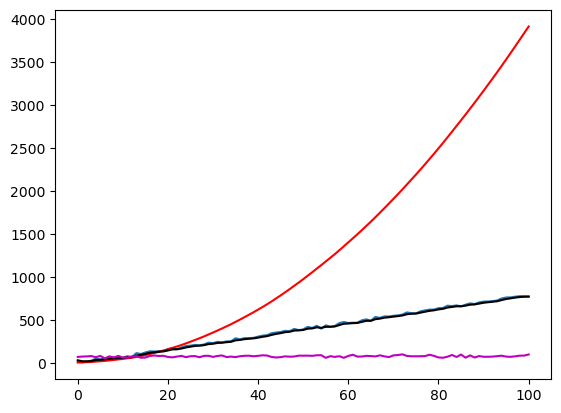

In [22]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["raw_signal"],label='sensor_data')
axes.plot(data["sample"],data["Kalman_pos"],color='r', label="filtered signal")
axes.plot(data["sample"],data["Kalman_vel"],color='k', label="filtered signal")
axes.plot(data["sample"],data["True_speed"],color='m', label="filtered signal")




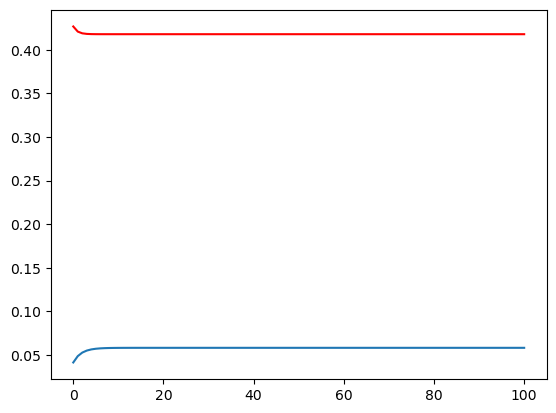

In [23]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["k1_gain"],label='sensor_data')
axes.plot(data["sample"],data["k2_gain"],color='r', label="filtered signal")


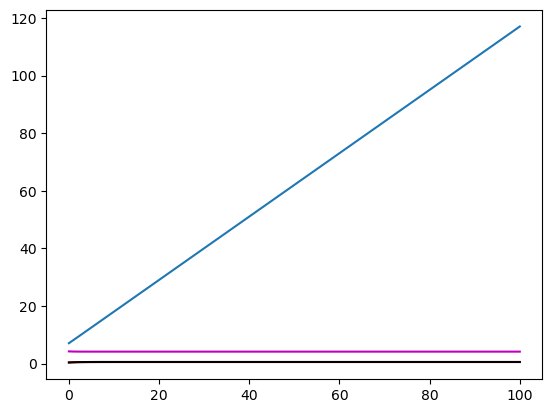

In [24]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(data["sample"],data["k_cov_00"],label='sensor_data')
axes.plot(data["sample"],data["k_cov_01"],color='r', label="filtered signal")
axes.plot(data["sample"],data["k_cov_10"],color='k', label="filtered signal")
axes.plot(data["sample"],data["k_cov_11"],color='m', label="filtered signal")
